# Camera Models and Augmented Reality
# 4.1 The Pin-hole Camera Model
- The pin-hole camera model is a widely used camera model in computer vision.
- It collects light through a small hole to the inside of a dark box or room.
- Light passes through a single point, the camera center, C, before it is projected onto an image plane.
- Assumption that the image axis are aligned with the x and y axis of a 3D coordinate system.
- The optical axis of the camera then coincides with the z axis and the projection follows from similar triangles.
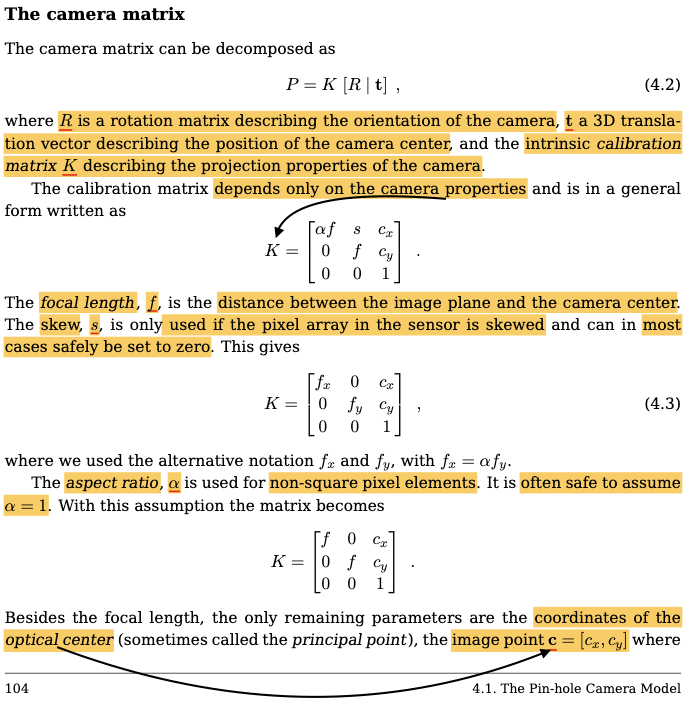
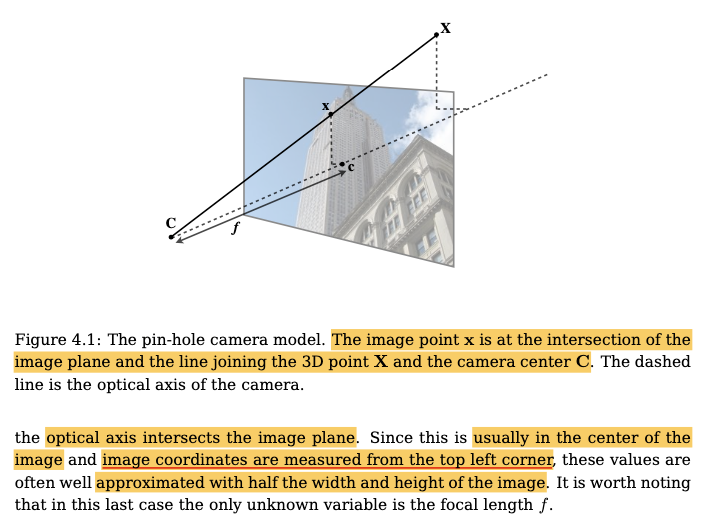

### Projecting 3D points

In [45]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

class Camera(object):
    def __init__(self, P):
        '''Initialize P = K[R|t] camera model'''
        self.P = P
        self.K = None # calibration matrix
        self.R = None # rotation
        self.t = None # translation
        self.c = None # camera center
        
    def project(self, X):
        '''Project points in X (4*n array) and normalize coordinates'''
        '''
        rotation -> when object radiation passess through a pin-hole,
        the object becomes up-side down.
        '''
        x = self.P.dot(X)
        for i in range(3):
            x[i] /= x[2]
        return x
    
    def factor(self):
        '''
        Factorize the camera matrix into K, R, t as P = K[R|t]
        '''
        # factor first 3*3 part
        K, R = linalg.rq(self.P[:, :3])

        # make diagonal of K positive
        T = np.diag(np.sign(np.diag(K)))
        if linalg.det(T) < 0:
            T[1,1] *= -1
            
        self.K = np.dot(K,T)
        self.R = np.dot(T,R) # T is its own inverse self.t = dot(linalg.inv(self.K),self.P[:,3])

        return self.K, self.R, self.t
    
    def center(self):
        """
        Compute and return the camera center.
        """
        if self.c is not None:
            return self.c

        else:
            # compute c by factoring self.factor()
            self.c = -np.dot(self.R.T, self.t)

        return self.c
    
def rotation_matrix(a):
    '''
    creates a 3D rotation matrix for rotation
    around the axis of the vector a.
    '''
    R = np.eye(4)
    R[:3, :3] = linalg.expm([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
    
    return R

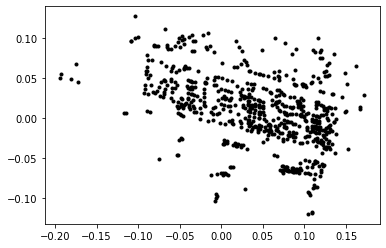

In [11]:
points = np.loadtxt('house.p3d').T
# homogeneous coordinates
points = np.vstack((points, np.ones(points.shape[1])))

# camera
P = np.hstack((np.eye(3), np.array([[0], [0], [-10]])))
cam = Camera(P)
x = cam.project(points)

plt.figure()
plt.plot(x[0], x[1], 'k.')
plt.show()

- To see how moving the camera changes the projection, try the following piece of code that incrementally rotates the camera around a random 3D axis.
- a projection of the 3D points and the projected 3D point tracks after the points have been rotated around a random vector.

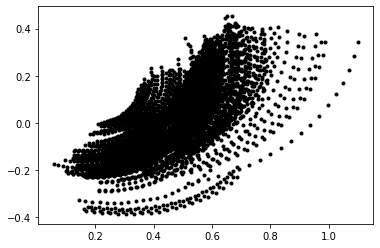

In [33]:
# create transformation
r = 0.05*np.random.rand(3)
rot = rotation_matrix(r)

# rotate camera and project
plt.figure()
for t in range(20):
    cam.P = np.dot(cam.P,rot)
    x = cam.project(points)
    plt.plot(x[0],x[1], 'k.')
plt.show()

### Factoring the camera matrix
- recover the internal parameters K and the camera position and pose t and R

In [ ]:
def factor():
    '''
    Factorize the camera matrix into K, R, t as P = K[R|t]
    '''
    # factor first 3*3 part
    K, R = linalg.rq(self.P[:, :3])
    
    # make diagonal of K positive
    T = diag(sign(diag(K))) if linalg.det(T) < 0:
    T[1,1] *= -1
    self.K = np.dot(K,T)
    self.R = np.dot(T,R) # T is its own inverse self.t = dot(linalg.inv(self.K),self.P[:,3])
    
    return self.K, self.R, self.t

In [43]:
K = np.array([[1000,0,500],[0,1000,300],[0,0,1]])
tmp = rotation_matrix([0,0,1])[:3,:3]
Rt = np.hstack((tmp, np.array([[50],[40],[30]])))
cam = Camera(np.dot(K,Rt))

print(K,Rt)
print(cam.factor())

[[1000    0  500]
 [   0 1000  300]
 [   0    0    1]] [[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]
(array([[ 1000.,     0.,   500.],
       [    0., -1000.,   300.],
       [    0.,     0.,     1.]]), array([[ 0.54030231, -0.84147098,  0.        ],
       [-0.84147098, -0.54030231,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]), None)


### computing the camera center
- Camera projection matrix P is useful to be able to compute the camera's position in space.
- camera center, 'C' is a 3D point with the property PC = 0.
- $K[R|t]C = KRC + Kt = 0$
- $C = -R^{T}t$

In [ ]:
def center(self):
    """ Compute and return the camera center. """
    if self.c is not None:
        return self.c
    
    else:
    # compute c by factoring self.factor()
    self.c = -np.dot(self.R.T, self.t)
    
    return self.c

# 4.2 Camera Calibration
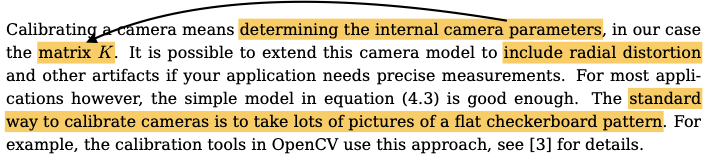
### A simple calibration method
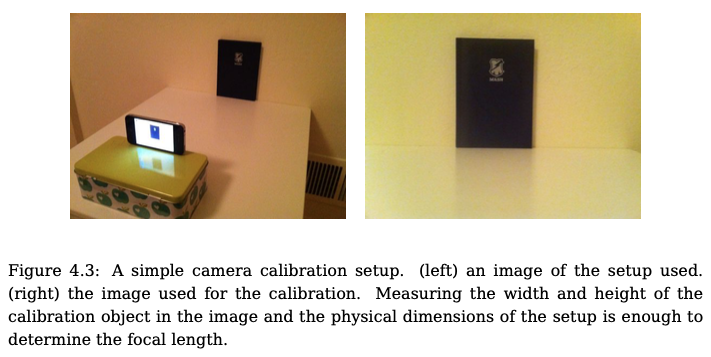
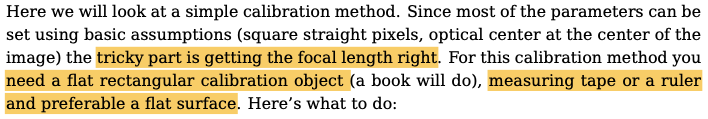
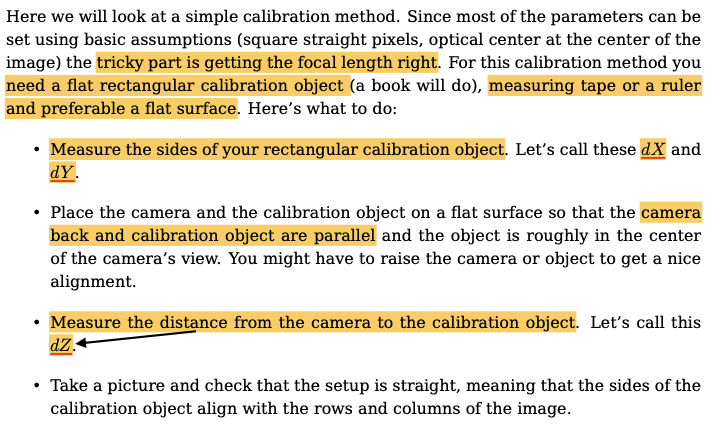
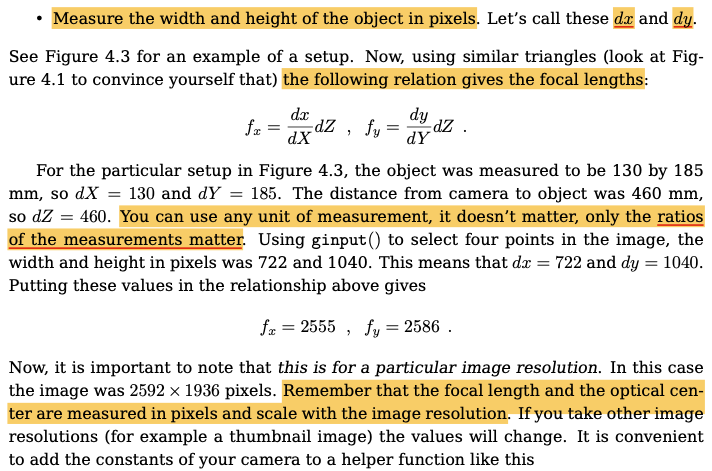

In [47]:
def my_calibration(sz):
    row,col = sz
    fx = 2555*col/2592
    fy = 2586*row/1936
    K = np.diag([fx,fy,1])
    K[0,2] = 0.5*col
    K[1,2] = 0.5*row
    
    return K